<a href="https://colab.research.google.com/github/fmerizzi/Mat_Optimization_algorithms/blob/main/File6_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title <h1>Lab3 : Optimization </h1>
%%html
<marquee style='width: 50%; color: red;'><b>Welcome to Lab3: Optimization of the SMM for AI course!</b></marquee>

# **Exercise 1**:

Write the Python functions implementing:
* the gradient method with: 
 	1. constant step length $\alpha$, 
 	2. step length $\alpha$ computed by backtracking procedure.

Test the gradient method functions on:

1.   $f(x)=\lVert x - b \rVert_{2}^{2} + \lambda \lVert x \rVert_{2}^{2}$, where $x \in \mathbb{R}^{2}$, $b=(1,1)$ and $\lambda \in \mathbb{R}$.

***Trace for the discussion:*** Choose a random value for the $\lambda$ parameter. Discuss the differences between a constant step length $\alpha$ choice and the backtracking procedure. What happens if you take large values of $\alpha$? Plot the function, the contour, the iterations computed on the contour plot. Moreover, compare the computed solutions by setting different values for the parameter $\lambda$. What do you notice for large values of $\lambda$? Try to explain it. Plot the function, the contour, the iterations computed on the contour plot.


2.   $f(x,y)=sin(\dfrac{1}{2} x^2-\dfrac{1}{4} y^2+3)cos(2x+1-e^y)$

***Trace for the discussion:*** Discuss the differences between a constant step length $\alpha$ choice and the backtracking procedure. Choose different starting point. What do you notice? Plot the function, the contour, the iterations computed on the contour plot.


#example without backtracking (should be removed)

z =  91.03999999999996
(x,y) =  [4.2 4.2]
z =  15.68639999999999
(x,y) =  [1.88 1.88]
z =  3.6298239999999975
(x,y) =  [0.952 0.952]
z =  1.7007718399999994
(x,y) =  [0.5808 0.5808]
z =  1.3921234943999998
(x,y) =  [0.43232 0.43232]
z =  1.3427397591040002
(x,y) =  [0.372928 0.372928]
z =  1.33483836145664
(x,y) =  [0.3491712 0.3491712]
z =  1.3335741378330623
(x,y) =  [0.33966848 0.33966848]
z =  1.3333718620532902
(x,y) =  [0.33586739 0.33586739]
[[34.         33.43924089 32.88827671 ... 25.21150903 25.60085706
  26.        ]
 [33.43924089 32.87848179 32.3275176  ... 24.65074992 25.04009795
  25.43924089]
 [32.88827671 32.3275176  31.77655341 ... 24.09978574 24.48913376
  24.88827671]
 ...
 [25.21150903 24.65074992 24.09978574 ... 16.42301806 16.81236609
  17.21150903]
 [25.60085706 25.04009795 24.48913376 ... 16.81236609 17.20171411
  17.60085706]
 [26.         25.43924089 24.88827671 ... 17.21150903 17.60085706
  18.        ]]


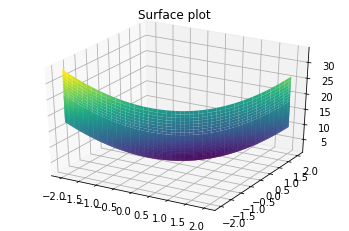

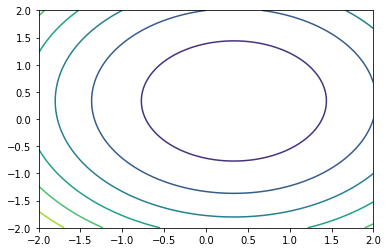

In [84]:
# WITHOUT BACKTRACKING 

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

def f(x,y):
    b = np.array([1,1])
    l = 1
    return (x - b[0])**2 + (y - b[1])**2 + l*(x**2 + y**2)  

def grd(x):
  b = np.array([1,1])
  l = 1
  return 2*(x-b) + l*2*x 

def step(k, step):
  return k - step*grd(k) 

def stopCrit(k,tau):

  #print("norm :", np.linalg.norm(grd(k)))
  if(np.linalg.norm(grd(k)) < tau) :
    return True 
  else:
    return False 

start = np.array([10,10])
stop = False


while stop == False:
  stop = stopCrit(start,0.1)
  start = step(start,0.1)
  print("z = ",f(start[0],start[1]));
  print("(x,y) = ",start)

x = np.linspace(-2,2,100)
y = np.linspace(-2,2, 100)
xv, yv = np.meshgrid(x, y) 

z=f(xv,yv)

print(z)


fig = plt.figure()
ax = plt.axes(projection='3d')
#you plot on the axes?
ax.plot_surface(x, y, z,cmap='viridis')
ax.set_title('Surface plot')
plt.show()

contours = plt.contour(x, y, z)



# Solution, implementing backtracking

backtracking iterations :  5
-----
backtrack alpha =  0.1875
z =  23.5625
backtracking iterations :  0
-----
backtrack alpha =  0.1875
z =  2.41015625
backtracking iterations :  0
-----
backtrack alpha =  0.1875
z =  1.088134765625
backtracking iterations :  0
-----
backtrack alpha =  0.1875
z =  1.0055084228515625
backtracking iterations :  0
-----
backtrack alpha =  0.1875
z =  1.0003442764282227
backtracking iterations :  0
-----
backtrack alpha =  0.1875
z =  1.000021517276764
--- ALGORITHM --- 
algorithm was stopped by gradient < tau, after iterations :  6
 ----------------- 
---history---
[[10.         10.        ]
 [ 2.875       2.875     ]
 [ 1.09375     1.09375   ]
 [ 0.6484375   0.6484375 ]
 [ 0.53710938  0.53710938]
 [ 0.50927734  0.50927734]
 [ 0.50231934  0.50231934]]
---history---


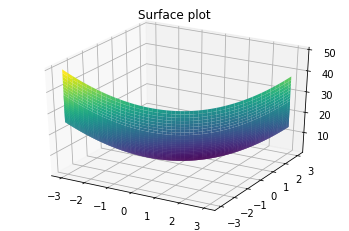

<function matplotlib.pyplot.show>

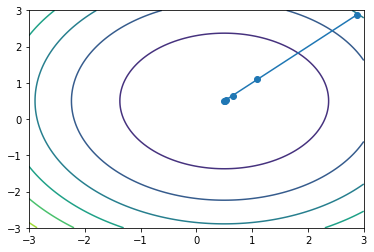

In [145]:
# BACKTRACKING 

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

lambd = 1

def f(x,y):
  #definition of the function f
  b = np.array([1,1])
  lambd = 1
  return (x - b[0])**2 + (y - b[1])**2 + lambd*(x**2 + y**2)  

def grd(x):
  #definition of the gradient of function f
  b = np.array([1,1])
  lambd = 1
  return 2*(x-b) + lambd*2*x 

def back(k,tau):
  #function implementing backtracking algorithm
  alpha = tau
  ro = 0.5
  c1 = 0.5
  j = 0

  lastFactor  = np.matmul(np.transpose(grd(k)), -grd(k))
  #print("last Factor : ", c1*alpha*lastFactor)
  value = k-alpha*grd(k)
  #print("function value : ", f((k-alpha*grd(k))[0],(k-alpha*grd(k))[1]))
  #print("function second value: ", f(k[0],k[1]))

  max = 20

  while f((k-alpha*grd(k))[0],(k-alpha*grd(k))[1]) > (f(k[0],k[1]) + c1*alpha*lastFactor) and j<20:
    alpha = ro*alpha 
    j += 1
  
  print("backtracking iterations : ", j)
  return alpha

def step(k, step):
  #function computing the n-step of the optimization 
  return k - step*grd(k) 

def stopCrit(k,tau):
  #function computing the stop criteria, based on the norm of the gradient
  #print("norm :", np.linalg.norm(grd(k)))
  if(np.linalg.norm(grd(k)) < tau) :
    return True 
  else:
    return False 

## MAIN CYCLE 

start = np.array([10,10])
story = np.array([[10,10]])
stop = False
iterations = 0
max = 10
tau = 6

while (stop == False and iterations < max):
  stop = stopCrit(start,tau)

  tau = back(start,tau) 
  print("-----")
  print("backtrack alpha = ",tau)
  start = step(start,tau)
  story = np.append(story,[start],0)
  f_start = f(start[0],start[1])

  iterations += 1

  print("z = ",f_start);
  #print("(x,y) = ",start)

print("--- ALGORITHM --- ")
if(stop == True):
  print("algorithm was stopped by gradient < tau, after iterations : ", iterations)
elif(iterations >= max) :
  print("algorithm was stopped by too much iterations in main cycle, iter : ",iterations)
print(" ----------------- ")

print("---history---")
print(story)
print("---history---")

#code for printing graphs
 
x = np.linspace(-3,3,100)
y = np.linspace(-3,3, 100)
xv, yv = np.meshgrid(x, y) 

z=f(xv,yv)
fig = plt.figure()
ax = plt.axes(projection='3d')
#you plot on the axes?
ax.plot_surface(x, y, z,cmap='viridis')
ax.set_title('Surface plot')
plt.show()

contours = plt.contour(x, y, z)
plt.plot(story[1:,0], story[1:,1], '-o')
plt.show

# **Exercise 2**:

Write a Python function implementing:
* The mini-batch stochastic gradient descent with 
  1. constant step length $\alpha$ 

that solves the following problems.


Let's construct three different dataset $(x_{i},y_{i})_{i=1 \dots t}$, $(x_{i},\tilde{y}_{i})_{i=1 \dots t}$, $(x_{i},z_{i})_{i=1 \dots t}$ where $x_{i} \in \mathbb{R}^{n}$ and $y_{i}, \tilde{y}_{i},z_{i} \in \mathbb{R}$. Define a set of input $x_{i}$ for $i=1 \dots t$. Choose $w \in \mathbb{R}^{n}$  and define:

\begin{equation}
y_{i} = w_{1} x^{1}_{i} + \dots + w_{1} x^{n}_{i},  
\end{equation}
\begin{equation}
\tilde{y}_{i}= w_{1} x^{1}_{i} + \dots + w_{1} x^{n}_{i} + \eta_{i},
\end{equation}
\begin{equation}
z_{i}= w_{1} (x^{1}_{i})^{2} + \dots + w_{1} (x^{n}_{i})^2.
\end{equation}


Now, considering the aformention dataset solve the following optimization problems with the the mini-batch stochastic gradient descent algorithm:

\begin{equation}
\min_{\theta \in \mathbb{R}^{n}} \sum_{i=1}^{t} ( \theta \cdot x_{i} - y_{i} )^{2}, \quad
\min_{\theta \in \mathbb{R}^{n}} \sum_{i=1}^{t} ( \theta \cdot x_{i} - \tilde{y}_{i} )^{2}, \quad
\min_{\theta \in \mathbb{R}^{n}} \sum_{i=1}^{t} ( \theta \cdot x_{i} - z_{i} )^{2}
\end{equation}
where $\theta \cdot x_{i}=\theta_{1} x^{1}_{i} + \dots + \theta_{1} x^{n}_{i}$.

***Trace for the discussion:*** Compare  the solutions of the previous problems with the fixed $w$. Comment the results varying the batch size and the step length $\alpha$. Plot the loss function along the optimization algorithm iterations by choosing different batch size. Evaluate the errors between $y_{i}$,$\tilde{y}_{i}$,$z_{i}$ and $\theta_{1} \cdot x_{i}$, $\theta_{2} \cdot x_{i}$,$\theta_{3} \cdot x_{i}$, respectively, for $i=1 \dots t$. We refer to $\theta_{1},\theta_{2},\theta_{3}$ as the solutions of the three optimization problems. 
 













# **Exercise 3**:
Write a Python function implementing:
* The steepest-descent algorithm with: 
 	1. step length $\alpha$ computed by backtracking procedure

Consider the quadratic convex function:

\begin{equation*}
	\min f(x)=\frac{1}{2}x^TAx-b^Tx
\end{equation*}
with
\begin{equation*}
	A=\begin{pmatrix}
	1 & 0 & 0 \\
	0 & \gamma & 0 \\
	0 & 0 & \gamma^2 \\
\end{pmatrix},
\quad b=\begin{pmatrix}
	1 \\
	1 \\
	1 \\
\end{pmatrix}
\end{equation*}

Choose $x_0 \in \mathbb{R}^{3}$ and use the values  $\gamma=0.001,0.01,0.1,1,10,100$.
	
***Trace for the discussion:*** Compare the CG method and the steepest descent algorithm. Compare their error, their number of iterations. The exact solution is $x= (1, \dfrac{1}{\gamma}, \dfrac{1}{\gamma^{2}})$.Choose different values of  $\gamma$. What can we say about the method convergence? The $A$-norm is defined as follows: 

$${\displaystyle \|s \|_{A}:=s ^{T}A s },$$

for a generic vector $s$. According to the theory, comment the behaviour of the sequence $\lVert e^{k}\rVert_{A}$, where $e^{k}=x^{k}-x$, $x^{k}$ is the $k$-th iterate and $x$ is the exact solution.

*** comments 

the conjugate method is significantly faster than gradient descent



In [150]:
 #implementation (works good)

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

lamda = 0.1

def f_grad(x,y,z):

  #function for computing che gradient 
  A = np.array([[1,0,0],[0,lamda,0],[0,0,lamda**2]])
  b = np.array([1,1,1])

  return np.dot(A,np.array([x,y,z])) - b  
  # gradiant of the function is Qx - b

def f_alpha(start):
  #function for calculating the step alpha
  A = np.array([[1,0,0],[0,lamda,0],[0,0,lamda**2]])
  gk = f_grad(start[0],start[1],start[2])

  upper = np.dot(gk.T,gk)
  lower = (np.dot(np.dot(gk.T,A),gk))
  return upper/lower 

def stop_criteria(start):
  #function for computing the stop criteria 
  tau = 0.1
  #print("norm :", np.linalg.norm(grd(k)))
  if(np.linalg.norm(f_grad(start[0],start[1],start[2])) < tau) :
    return True 
  else:
    return False 


break_i = False
max = 100
alpha = 0
j = 0
start = np.array([4,4,4])
story = np.array([[4,4,4]])

#MAIN CYCLE 
while break_i == False and j < max:
  
  #get the gradiant 
  gk = f_grad(start[0],start[1],start[2])
  #compute step alpha
  alpha = f_alpha(start)
  #print("alpha: " ,alpha)
  #compute next step 
  start = start - alpha*gk
  #push index 
  j += 1
  #memorize steps
  story = np.append(story,[start],0)
  #check stop criteria
  break_i = stop_criteria(start)

  #some prints 

print("--- ALGORITHM --- ")
if(break_i == True):
  print("algorithm was stopped by gradient < tau, after iterations : ", j)
elif(j >= max) :
  print("algorithm was stopped by too much iterations in main cycle, iter : ",j)
print(" ----------------- ")

print("---history---")
print(story)
print("-------------")


--- ALGORITHM --- 
algorithm was stopped by gradient < tau, after iterations :  59
 ----------------- 
---history---
[[ 4.          4.          4.        ]
 [ 0.58993218  4.68201356  5.0912217 ]
 [ 3.28799824  8.18101495 11.33580226]
 [ 0.64758255  8.39093105 12.35901257]
 [ 3.05398098  9.48964537 18.34336815]
 [ 0.6780054   9.54868146 19.2879444 ]
 [ 2.88638167  9.85821496 24.82352133]
 [ 0.70377729  9.87461995 25.69333741]
 [ 2.73623775  9.96064644 30.79170927]
 [ 0.72731247  9.96519987 31.59248834]
 [ 2.59836239  9.98907803 36.28628081]
 [ 0.74896316  9.99034177 37.02348599]
 [ 2.4714624   9.9969688  41.34464445]
 [ 0.76889362  9.99731953 42.02332151]
 [ 2.3546397   9.99915875 46.00141551]
 [ 0.78724165  9.99925608 46.62621099]
 [ 2.24709201  9.99976653 50.28847592]
 [ 0.80413298  9.99979354 50.86366758]
 [ 2.14808277  9.9999352  54.23517765]
 [ 0.81968327  9.9999427  54.76470364]
 [ 2.05693408  9.99998202 57.86854249]
 [ 0.83399899  9.9999841  58.35602831]
 [ 1.97302187  9.99999501

##comments

- by varying lambda, the difficulty of the optimization changes greatly
- considering the factors 1/lambda and 1/lambda**2 , the more the value move from 1 the more complicate are the steps. 

# 2D test FOR VISUALIZING PURPOSES 


[[ 3.          3.        ]
 [ 1.49350649 -0.76623377]
 [-1.85425685  0.57287157]
 [-1.53252375  1.37720433]
 [-0.81756131  1.09121935]
 [-0.88627198  0.91944265]
 [-1.03896238  0.98051881]
 [-1.02428823  1.01720417]
 [-0.99167903  1.00416048]
 [-0.9948129   0.99632581]
 [-1.00177706  0.99911147]]
(50, 50)
[[520.         511.42857143 502.85714286 ... 117.14285714 108.57142857
  100.        ]
 [513.87755102 505.38942107 496.90129113 ... 114.93544357 106.44731362
   97.95918367]
 [507.75510204 499.35027072 490.9454394  ... 112.72802999 104.32319867
   95.91836735]
 ...
 [232.24489796 227.58850479 222.93211162 ...  13.39441899   8.73802582
    4.08163265]
 [226.12244898 221.54935444 216.97625989 ...  11.18700541   6.61391087
    2.04081633]
 [220.         215.51020408 211.02040816 ...   8.97959184   4.48979592
    0.        ]]


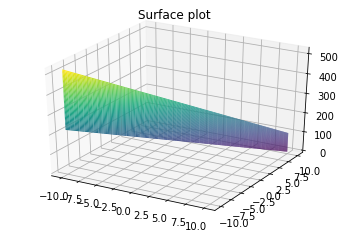

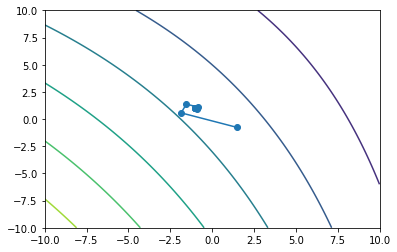

In [129]:
# 2-D visualizing test 

import numpy as np
from scipy import optimize
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

'''
Basic idea for making Broadcasting work 
is to refer to single-dimension values

'''

def f2(x,y):
  A = np.array([[1,2],[3,4]])
  b = np.array([1,1])
  
  xt = np.transpose(np.array([x[0],y[0]]))
  return 0.5* np.dot(np.dot(xt,A),np.array([x[0],y[0]])) - np.dot(b,np.array([x[0],y[0]]))

def grad2(x,y):

  A = np.array([[1,2],[3,4]])
  b = np.array([1,1])

  return np.dot(A,np.array([x,y])) - b  
  # gradiant of the function is Qx - b

def alpha2(start):

  A = np.array([[1,2],[3,4]])
  gk = grad2(start[0],start[1])

  return (np.dot(gk.T,gk))/(np.dot(np.dot(gk.T,A),gk))


def f(x):
  A = np.array([[1,0,0],[0,1,0],[0,0,1]])
  b = np.array([1,1,1])
  xt = np.transpose(x)

  return 0.5* np.dot(np.dot(xt,A),x) - (np.dot(np.transpose(b),x))

break_i = False
max = 10
alpha = 0
j = 0
start = np.array([3,3])
story = np.array([[3,3]])

#MAIN CYCLE 
while break_i == False and j < max:
  
  #get the gradiant 
  gk = grad2(start[0],start[1])
  #compute step alpha
  alpha = alpha2(start)
  #compute next step 
  start = start - alpha*gk
  #push index 
  j += 1
  #memorize steps
  story = np.append(story,[start],0)

  #some prints 

print(story)

x = np.linspace(-10,10,50)
y = np.linspace(-10,10, 50)
xv, yv = np.meshgrid(x, y) 
z=f2(xv,yv)

print(xv.shape)
print(z)

fig = plt.figure()
ax = plt.axes(projection='3d')
#you plot on the axes?
ax.plot_surface(x, y, z,cmap='viridis')
ax.set_title('Surface plot')
plt.show()

contours = plt.contour(x, y, z)
plt.plot(story[1:,0], story[1:,1], '-o')
plt.show()